Populating the interactive namespace from numpy and matplotlib


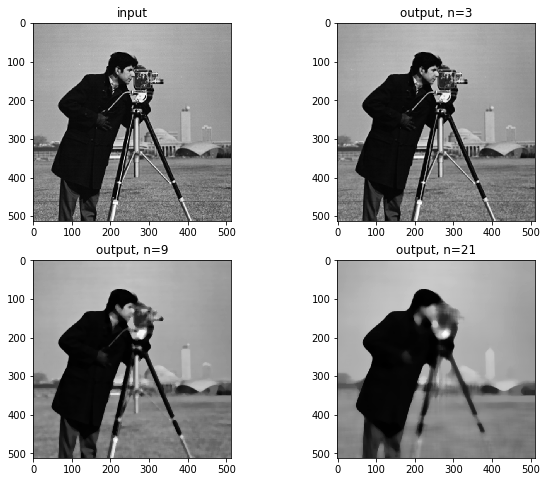

In [1]:
%pylab inline
from skimage import data
from skimage import filters
import skimage as ski
from items.ImageData import ImageData
from attributes import tools

figure(figsize=[10,8])

im = ski.img_as_ubyte(data.camera())
subplot(2,2,1); imshow(im, cm.gray); title("input")
Ns = [3,9,21]

data = ImageData()
data.init( *im.shape )
data.data_ui8 = im
with open('../data/AlgoTestDataProvider_input.bin', 'wb') as myfile:
    tools.bin_write(data,myfile)

for k in range(3):
    N = Ns[k]
    res = filters.median(im, ones((N,N),dtype=uint8))
    
    # write to disk
    data.init( *res.shape )
    data.data_ui8 = res
    with open('../data/AlgoTestDataProvider_N_{}.bin'.format(N), 'wb') as myfile:
        tools.bin_write(data,myfile)

    # display
    subplot(2,2,2+k); imshow(res, cm.gray); title("output, n={}".format(N))
